In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import os
#print(os.listdir("../Caliber Collision Center/"))

df = pd.read_csv('Caliber_Daily.csv')
df1 = df.set_index('Date')

In [3]:
dff = df1.loc[df1['Site'] == 'CCC0611']
dff.shape

(386, 3)

In [4]:
dff['Energy Consumption (kWh)'].min(), dff['Energy Consumption (kWh)'].max(), round(dff['Energy Consumption (kWh)'].mean(), 2)

(0.0, 1023.58, 586.57)

# ISOLATION FOREST (unsupervised recursive algorithm)

In [5]:
#number of features to train each tree, default
#max_features = 1.0 

#number of trees that will be built in the forest, default is 100
#n_estimators = 10 

#number of samples to be drawn to train each tree
#max_samples = 'auto' 

#expected proportion of outliers in dataset (threshold percent/fraction on the sample score)
contamination = float(0.05) 

In [6]:
model = IsolationForest(random_state = 0, contamination = contamination)

In [7]:
model.fit(dff[['Energy Consumption (kWh)']])

IsolationForest(contamination=0.05, random_state=0)

In [8]:
dff['scores'] = model.decision_function(dff[['Energy Consumption (kWh)']])

dff['anomaly_value'] = model.predict(dff[['Energy Consumption (kWh)']])
dff.head()

#lower the score, closer to 0, lesser outlying the datapoint

,Site,Site Name,Energy Consumption (kWh),scores,anomaly_value
Date,,,,,
11/1/2019,CCC0611,Caliber 0611,778.62,0.104186,1
11/2/2019,CCC0611,Caliber 0611,306.04,0.057060,1
11/3/2019,CCC0611,Caliber 0611,281.28,0.053754,1
11/4/2019,CCC0611,Caliber 0611,749.25,0.105784,1
11/5/2019,CCC0611,Caliber 0611,628.86,0.102910,1


In [ ]:
##resultsdf2 = dff.loc[dff['scores'] < 0]
#len(resultsdf2)
##resultsdf2.head()

In [9]:
outliers = dff.loc[dff['anomaly_value'] == -1]
outlier_index = list(outliers.index)

#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dff['anomaly_value'].value_counts())

 1    366
-1     20
Name: anomaly_value, dtype: int64


In [ ]:
##outliers_counter = len(dff[dff['Energy Consumption (kWh)'] > 3000])
#outliers_counter
##(outliers_counter/list(dff['anomaly_value']).count(-1))*100

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

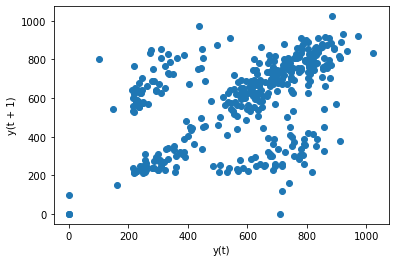

In [10]:
#dff['Energy Consumption (kWh)'].cumsum().plot()

pd.plotting.lag_plot(dff['Energy Consumption (kWh)'])

Text(0, 0.5, 'Energy Consumption (kWh)')

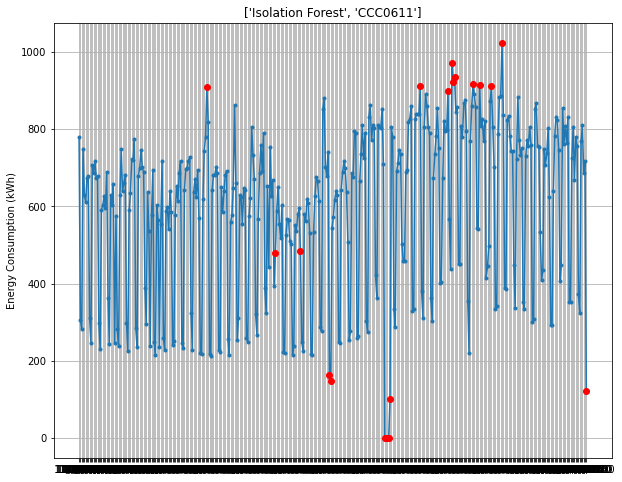

In [12]:
plt.figure(figsize = (10, 8))

plt.plot(dff['Energy Consumption (kWh)'], marker = '.')
plt.plot(outliers['Energy Consumption (kWh)'], 'o', color = 'red', label = 'outliers')
plt.title(['Isolation Forest', 'CCC0611'])

plt.grid()
#plt.xlabel('')
plt.ylabel('Energy Consumption (kWh)')
#plt.legend()